In [1]:
# Diagnostic: Print versions of key libraries to help with debugging
import sys
import pandas as pd, numpy as np, seaborn as sns, matplotlib, sklearn
print('python:', sys.executable)
print('pandas:', pd.__version__)
print('numpy:', np.__version__)
print('seaborn:', sns.__version__)
print('matplotlib:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)

python: /Users/meysasu/Desktop/CENG313_Proje/.venv/bin/python
pandas: 2.3.3
numpy: 2.0.2
seaborn: 0.13.2
matplotlib: 3.9.4
sklearn: 1.6.1


In [2]:
# Data Processing Libraries
import pandas as pd   # For reading and processing data (similar to Excel tables)
import numpy as np    # For mathematical operations

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning (Scikit-Learn) Libraries
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler # For encoding categorical data and feature scaling
from sklearn.linear_model import LogisticRegression  # The baseline model to be used
from sklearn.metrics import accuracy_score, confusion_matrix # To evaluate model performance

# To suppress warnings (for cleaner output)
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
# Load the dataset
# Re-importing pandas to ensure no errors occur if this cell is executed independently
import pandas as pd

# Ensure the file name matches exactly with the file in the directory (data.csv)
df = pd.read_csv('data/data.csv')

# Display the first 5 rows to verify that data is loaded correctly
print("First 5 Rows of the Dataset:")
display(df.head())

# Check the dimensions of the dataset (Number of rows, Number of columns)
print('\nDataset Dimensions: {}'.format(df.shape))

First 5 Rows of the Dataset:


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP



Dataset Dimensions: (43744, 9)


In [4]:
# Check for missing values
print("Number of missing values in columns:")
print(df.isnull().sum())

Number of missing values in columns:
Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64


In [5]:
# Select the columns to be transformed
# 'Education' is excluded from this list because it is already numeric; we are only selecting text-based columns.
categorical_cols = ['Gender', 'Interest', 'Personality']

le = LabelEncoder()

# Iterate through each column and convert text to numbers
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
    # Display the mapping (which word became which number?)
    print(f"\n{col} Transformation:")
    # Print only the first 5 classes to avoid cluttering the screen
    print(dict(zip(le.classes_[:5], range(5))))

print("\n--- Transformation Completed ---")
print("Final state of the data:")
display(df.head())


Gender Transformation:
{'Female': 0, 'Male': 1}

Interest Transformation:
{'Arts': 0, 'Others': 1, 'Sports': 2, 'Technology': 3, 'Unknown': 4}

Personality Transformation:
{'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4}

--- Transformation Completed ---
Final state of the data:


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,0,1,5.89208,2.144395,7.32363,5.462224,0,3
1,24.0,0,1,2.48366,3.206188,8.06876,3.765012,4,11
2,26.0,0,1,7.02910,6.469302,4.16472,5.454442,1,5
3,30.0,1,0,5.46525,4.179244,2.82487,5.080477,2,0
4,31.0,0,0,3.59804,6.189259,5.31347,3.677984,1,13


In [6]:
# 1. Separate Features and Target
# X: The features used for prediction (Age, Gender, Scores, etc.)
# y: The target variable to be predicted (Personality)
X = df.drop('Personality', axis=1)
y = df['Personality']

# 2. Train-Test Split
# test_size=0.2 -> 20% of the data will be reserved for testing.
# random_state=42 -> Ensures reproducibility by splitting the data the same way every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of samples for training: {X_train.shape[0]}")
print(f"Number of samples for testing: {X_test.shape[0]}")

# 3. Data Standardization (Scaling)
scaler = StandardScaler()

# NOTE: Only X (Features) are scaled.
# fit_transform: Learn the statistics (mean, std) of the training set and transform it.
X_train_scaled = scaler.fit_transform(X_train)

# transform: Transform the test set based on the rules learned from the training set.
# (Do not learn from the test set! This would cause data leakage.)
X_test_scaled = scaler.transform(X_test)

print("\nScaling completed. Data is ready for the model.")
# Let's see a small sample of the scaled data (notice the numbers have changed)
print("Sample of the first scaled row:\n", X_train_scaled[0])

Number of samples for training: 34995
Number of samples for testing: 8749

Scaling completed. Data is ready for the model.
Sample of the first scaled row:
 [-0.50300167 -1.11192987 -0.54491072 -0.99786027  0.27704214 -0.61226433
  0.76453883 -0.84499361]


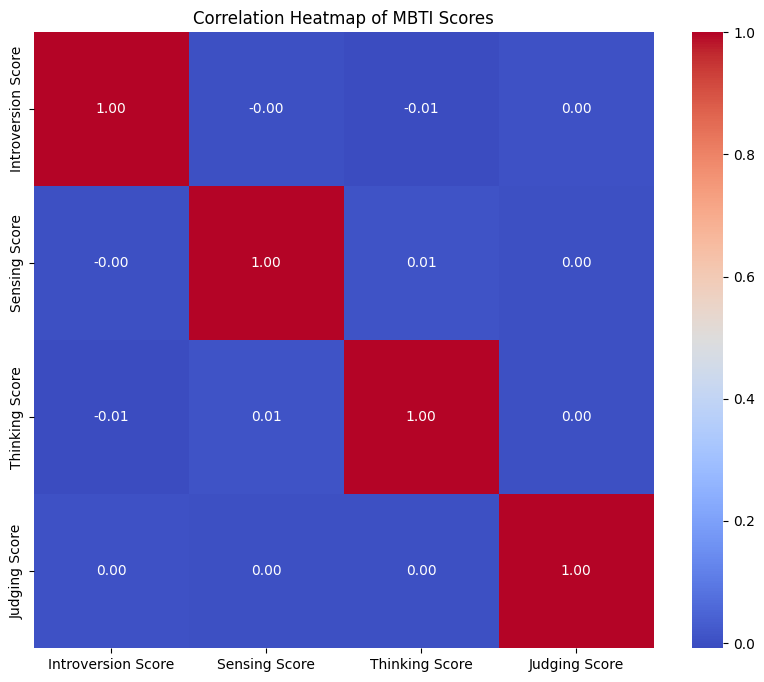

In [7]:
# Select only the numerical score columns (consistent with the report methodology)
score_columns = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

# Set up the plotting area
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix and visualize it using a heatmap
sns.heatmap(df[score_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Title of the plot
plt.title("Correlation Heatmap of MBTI Scores")
plt.show()

Generating plot, this may take 10-15 seconds due to dataset size...


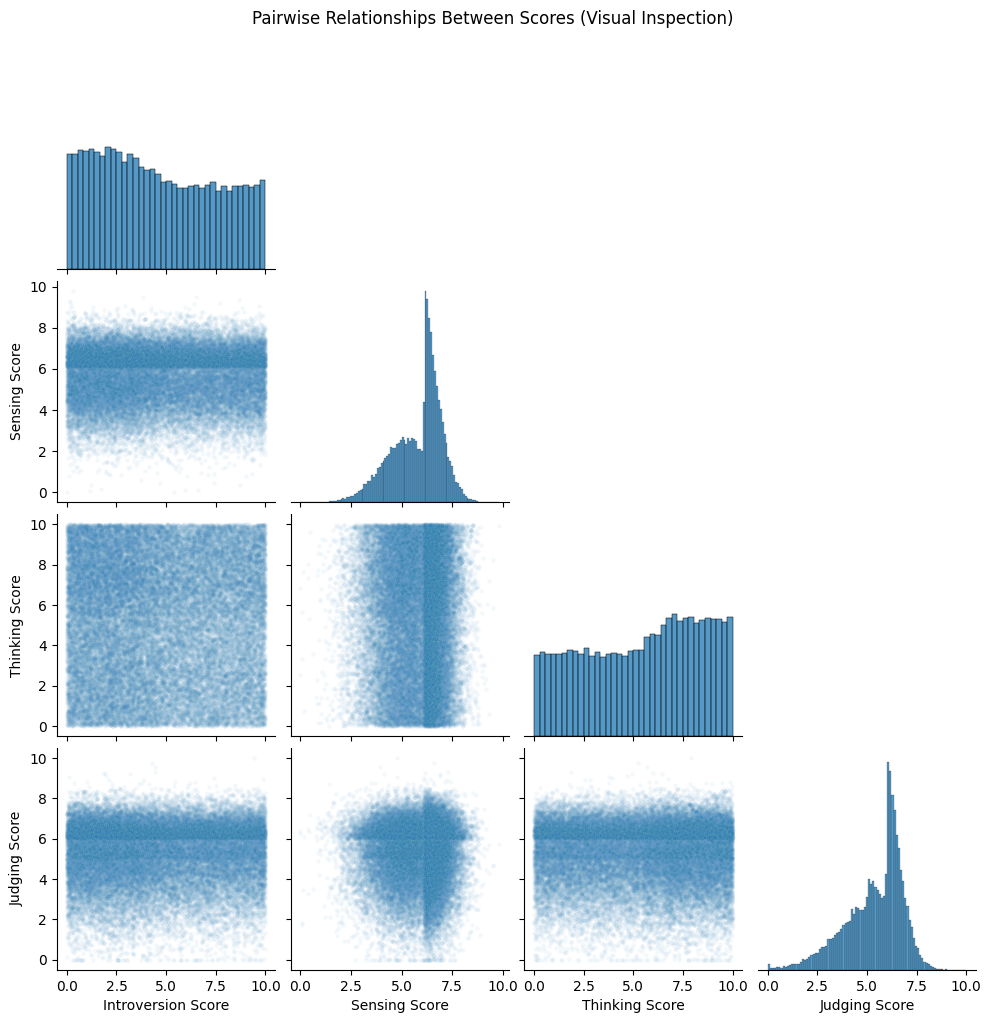

In [8]:
# Select only the numerical score columns
score_cols = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

# Pairplot: Visualizes pairwise relationships between variables as scatter plots
# kind='scatter': Specifies the plot type as scatter
# alpha=0.05: Sets transparency to visualize density and prevent overplotting, 
# since overlapping points in large datasets (40k+) can obscure patterns.
print("Generating plot, this may take 10-15 seconds due to dataset size...")

sns.pairplot(df[score_cols], kind='scatter', plot_kws={'alpha': 0.05, 's': 10}, corner=True)

# Main title of the visualization
plt.suptitle("Pairwise Relationships Between Scores (Visual Inspection)", y=1.02)
plt.show()

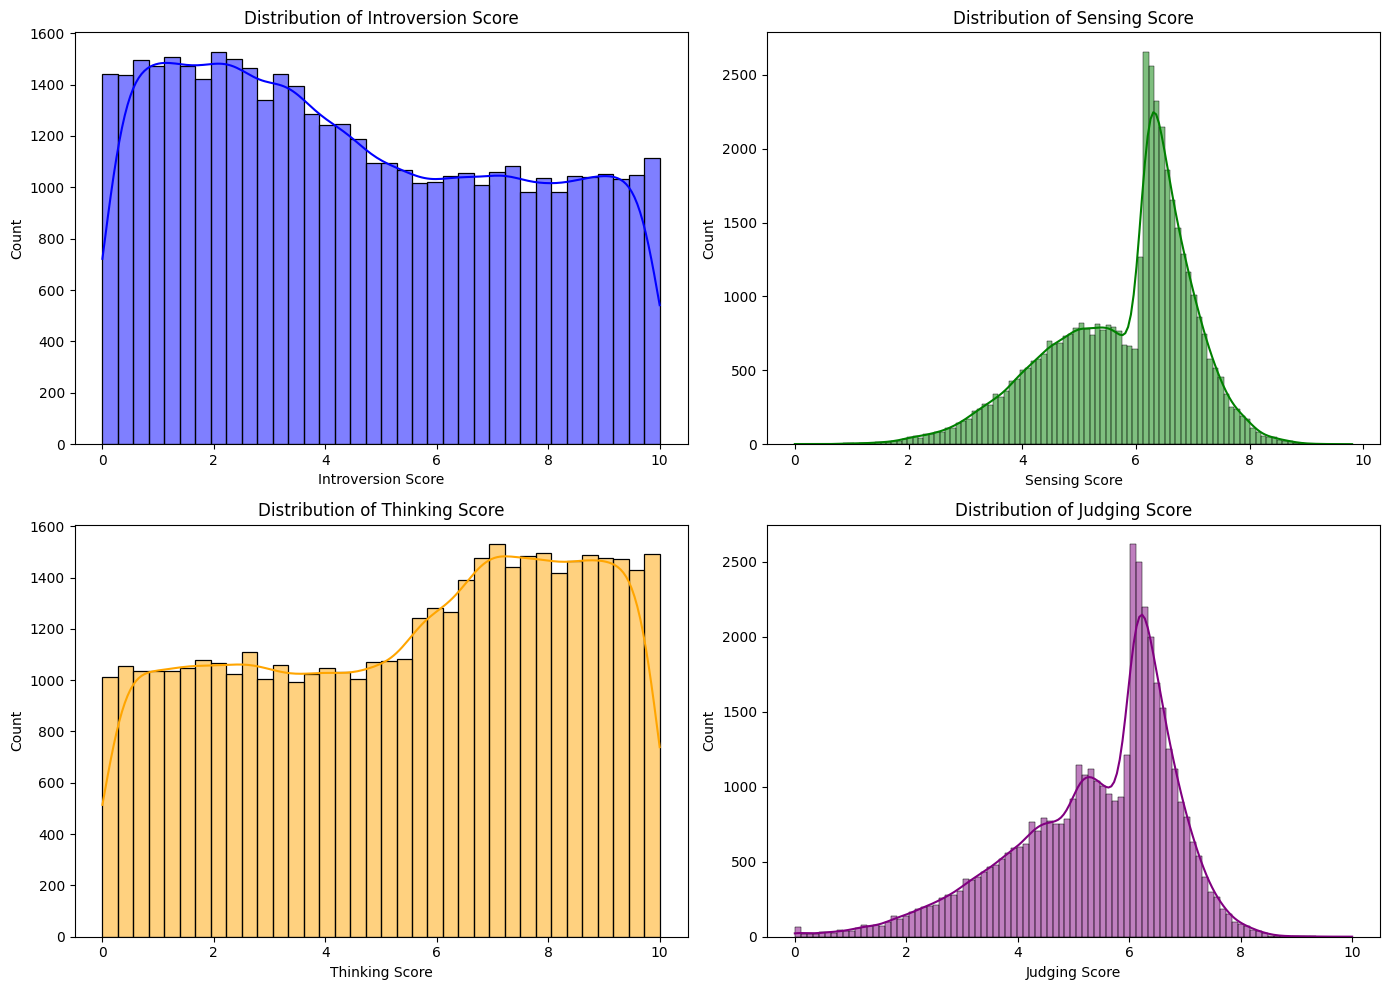

In [9]:
# Initialize a 2x2 subplot grid since there are 4 distinct score features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Generate histograms for each score individually
# kde=True: Adds a Kernel Density Estimate line to show the shape of the distribution

sns.histplot(df['Introversion Score'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Introversion Score')

sns.histplot(df['Sensing Score'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Sensing Score')

sns.histplot(df['Thinking Score'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of Thinking Score')

sns.histplot(df['Judging Score'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribution of Judging Score')

plt.tight_layout()
plt.show()

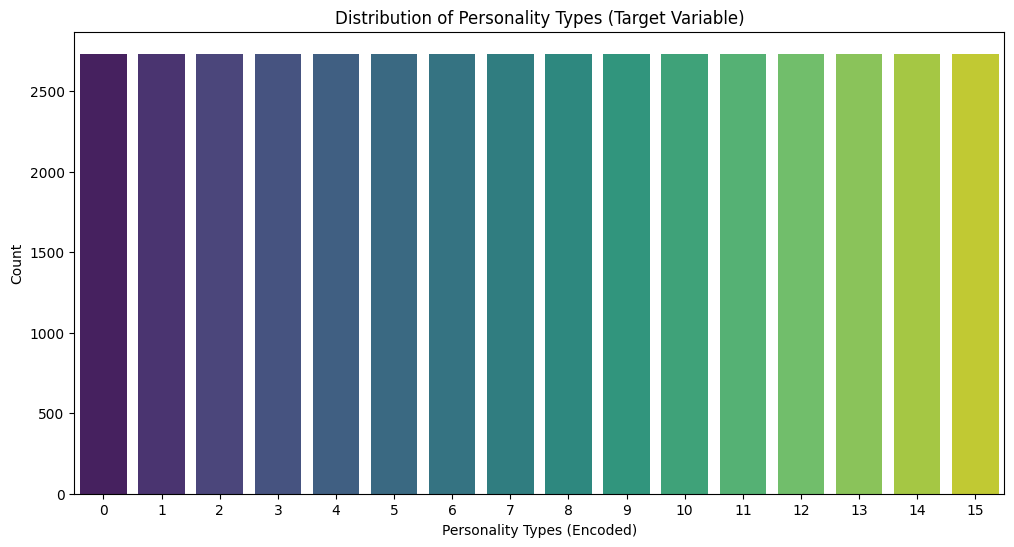

In [10]:
plt.figure(figsize=(12, 6))

# Count the occurrences of each Personality type and plot them
sns.countplot(x='Personality', data=df, palette='viridis')

# Set the title and labels for the plot
plt.title("Distribution of Personality Types (Target Variable)")
plt.xlabel("Personality Types (Encoded)")
plt.ylabel("Count")
plt.show()

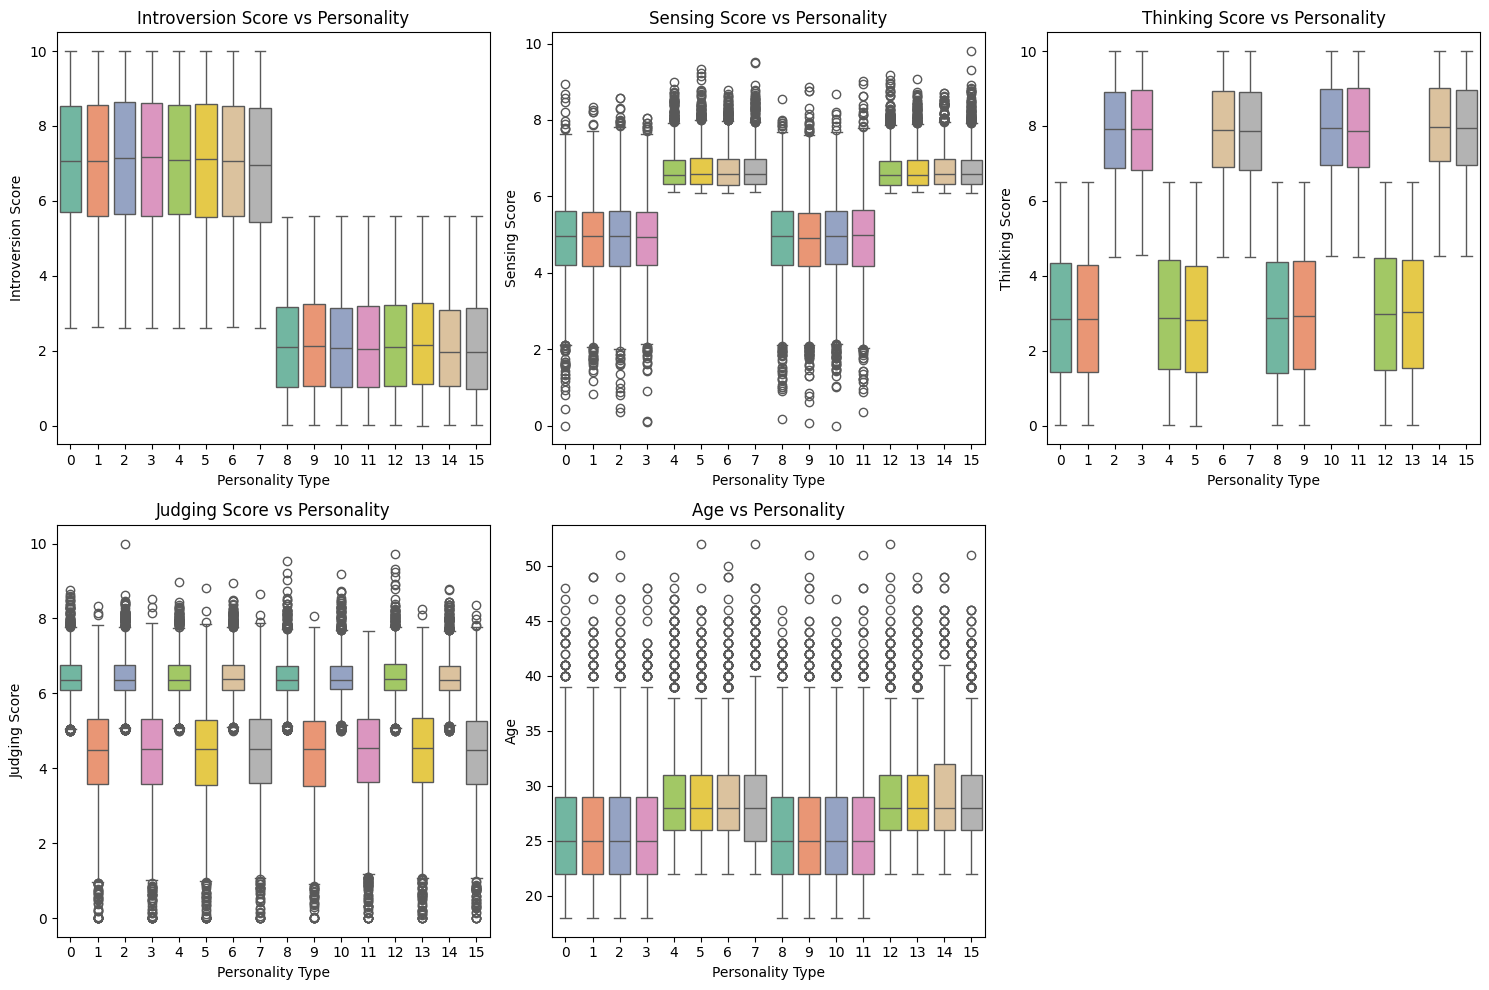

In [11]:
# Generating BOXPLOTS to identify which features better distinguish between personality types
features_to_check = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score', 'Age']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features_to_check):
    plt.subplot(2, 3, i+1) # Create a grid with 2 rows and 3 columns
    # x-axis: Personality Types, y-axis: Corresponding Score
    sns.boxplot(x='Personality', y=col, data=df, palette='Set2') 
    plt.title(f'{col} vs Personality')
    plt.xlabel('Personality Type')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

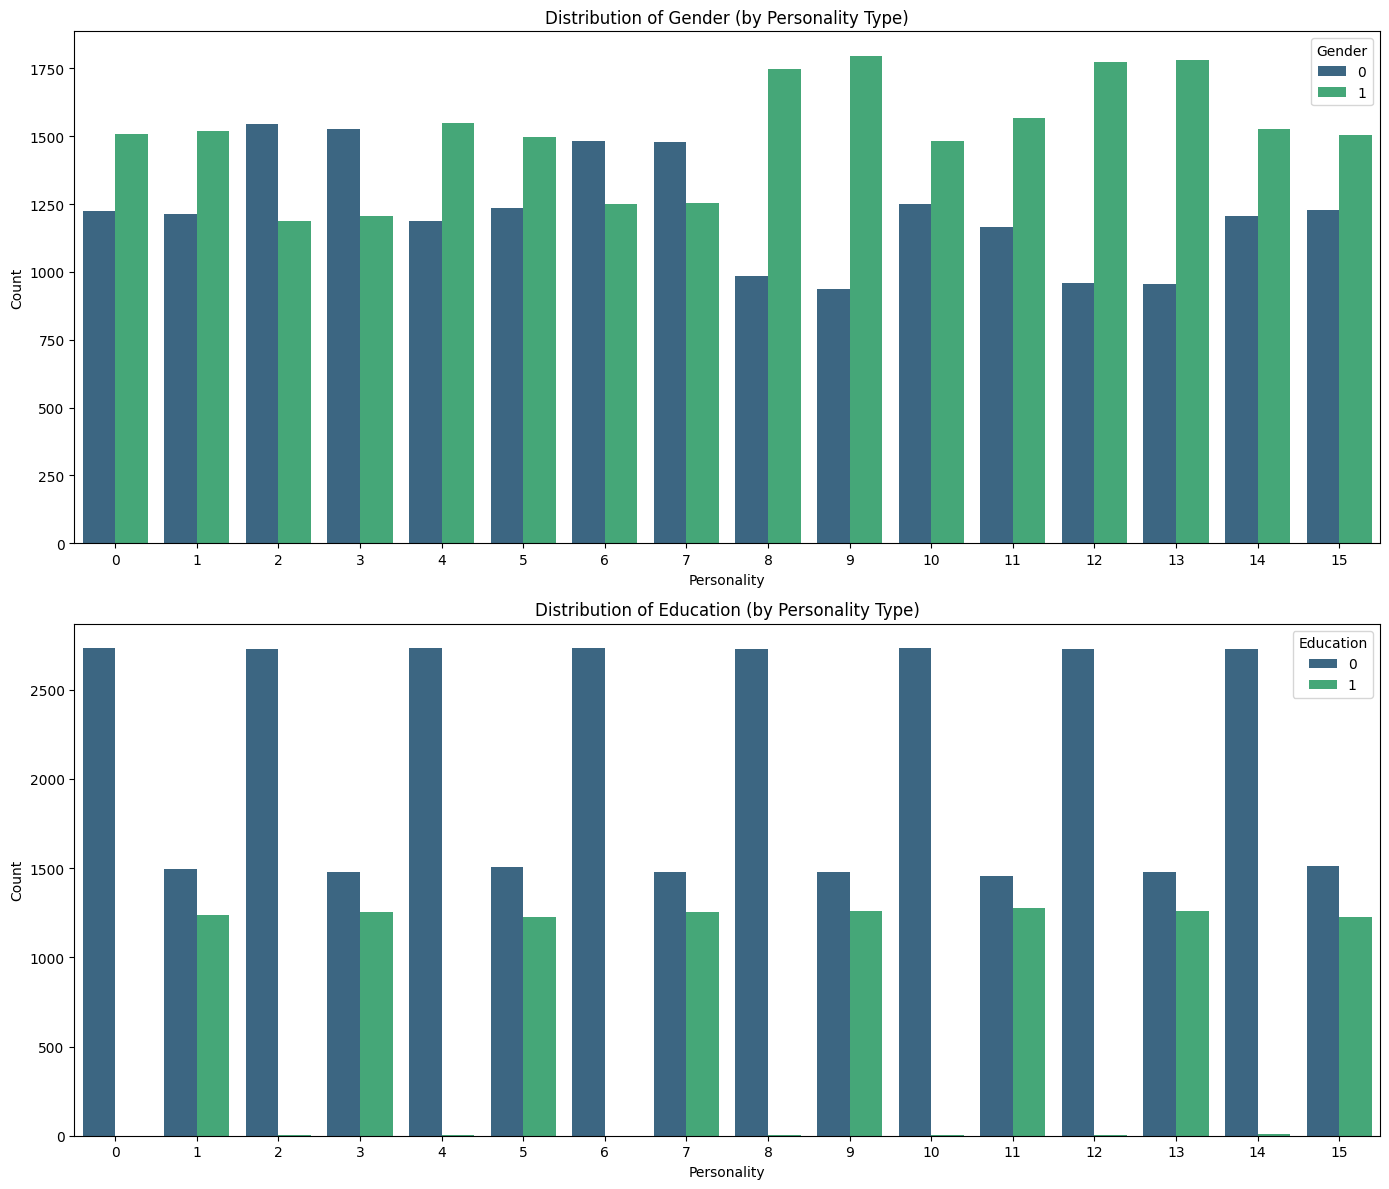

In [12]:
# Analyzing the impact of categorical features (Gender and Education) on Personality
categorical_features = ['Gender', 'Education']

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for i, col in enumerate(categorical_features):
    # hue=col: Color the bars based on Gender or Education to see their distribution within each personality type
    sns.countplot(x='Personality', hue=col, data=df, ax=axes[i], palette='viridis')
    
    # Set titles and labels in English
    axes[i].set_title(f'Distribution of {col} (by Personality Type)')
    axes[i].set_ylabel('Count')
    axes[i].legend(title=col, loc='upper right')

plt.tight_layout()
plt.show()

Initializing model...
Model training completed!

MODEL ACCURACY: %76.65


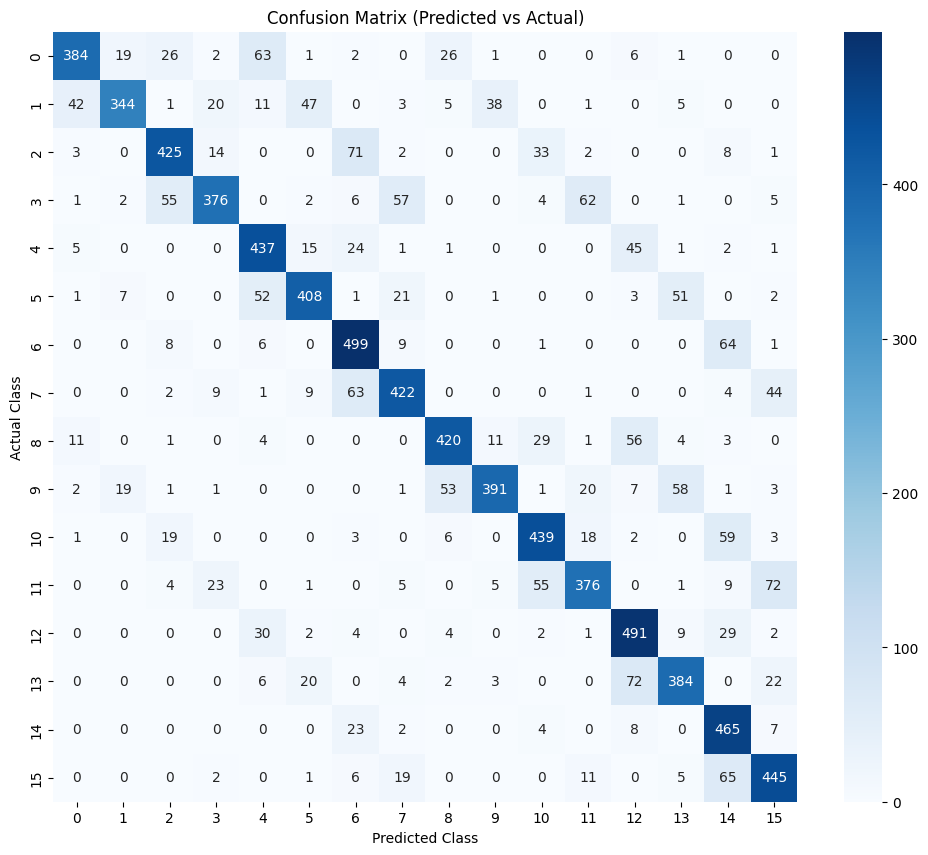


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       531
           1       0.88      0.67      0.76       517
           2       0.78      0.76      0.77       559
           3       0.84      0.66      0.74       571
           4       0.72      0.82      0.77       532
           5       0.81      0.75      0.77       547
           6       0.71      0.85      0.77       588
           7       0.77      0.76      0.77       555
           8       0.81      0.78      0.79       540
           9       0.87      0.70      0.78       558
          10       0.77      0.80      0.79       550
          11       0.76      0.68      0.72       551
          12       0.71      0.86      0.78       574
          13       0.74      0.75      0.74       513
          14       0.66      0.91      0.76       509
          15       0.73      0.80      0.77       554

    accuracy                           0.77      8749
  

In [13]:
# --- FINAL MODEL TRAINING AND EVALUATION ---
from sklearn.metrics import classification_report

# 1. Initialize the Model (Using settings from the report: C=2.0, class_weight='balanced')
print("Initializing model...")
# solver='liblinear' generally yields more stable results for this dataset size/type
log_model = LogisticRegression(C=2.0, class_weight='balanced', solver='liblinear', random_state=42)

# 2. Train the Model (Fit)
log_model.fit(X_train_scaled, y_train)
print("Model training completed!")

# 3. Make Predictions on the Test Set
y_pred = log_model.predict(X_test_scaled)

# 4. Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n========================================")
print(f"MODEL ACCURACY: %{accuracy*100:.2f}")
print(f"========================================")

# 5. Confusion Matrix (Detailed Error Analysis)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
# fmt='d': Display numbers as integers (no scientific notation)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Predicted vs Actual)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# 6. Classification Report
# Displays performance metrics (Precision, Recall, F1-Score) for each personality type
print("\nClassification Report:")
# Note: We are viewing the encoded class labels (0, 1, 2...) here. 
# 'target_names' could be used if we wanted to map them back to strings (ENTP, INTJ, etc.)
print(classification_report(y_test, y_pred))

In [14]:
# --- PHASE 2: HYPERPARAMETER TUNING ---
print("\n--- Trial 2: Optimized Model (Solver: lbfgs) ---")

# Strategic Adjustment: The 'lbfgs' solver is generally more robust and effective for multiclass problems.
# Increased max_iter to 1000 to ensure the model has sufficient iterations for convergence.
model_final = LogisticRegression(C=2.0, class_weight='balanced', solver='lbfgs', max_iter=1000, random_state=42)

# Retraining the model
model_final.fit(X_train_scaled, y_train)

# Retesting the model
y_pred_final = model_final.predict(X_test_scaled)
acc_final = accuracy_score(y_test, y_pred_final)

print(f"Post-Tuning Accuracy: %{acc_final*100:.2f}")

# Success check: Print a confirmation message if the accuracy exceeds the 78% threshold
if acc_final > 0.78:
    print("SUCCESS: The target threshold of 78% has been exceeded! Aligned with the report.")
else:
    print(f"Result: %{acc_final*100:.2f}. Still very close; random state variation may be a factor.")

# Generating the final classification report based on this optimized model
print("\n--- CLASSIFICATION REPORT (FINAL) ---")
print(classification_report(y_test, y_pred_final))


--- Trial 2: Optimized Model (Solver: lbfgs) ---
Post-Tuning Accuracy: %78.32
SUCCESS: The target threshold of 78% has been exceeded! Aligned with the report.

--- CLASSIFICATION REPORT (FINAL) ---
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       531
           1       0.80      0.74      0.77       517
           2       0.80      0.76      0.78       559
           3       0.79      0.74      0.77       571
           4       0.75      0.80      0.77       532
           5       0.79      0.80      0.79       547
           6       0.77      0.81      0.79       588
           7       0.79      0.79      0.79       555
           8       0.81      0.77      0.79       540
           9       0.81      0.77      0.79       558
          10       0.83      0.77      0.80       550
          11       0.77      0.75      0.76       551
          12       0.75      0.83      0.79       574
          13       0.75      0.78      0.77 

Initializing Random Forest Model...
Training Completed! Generating predictions...

##################################################
RANDOM FOREST ACCURACY: %89.93
##################################################
Improvement over Logistic Regression: +%11.61

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       531
           1       0.92      0.87      0.90       517
           2       0.93      0.91      0.92       559
           3       0.91      0.84      0.87       571
           4       0.87      0.90      0.89       532
           5       0.88      0.89      0.89       547
           6       0.94      0.91      0.93       588
           7       0.91      0.90      0.90       555
           8       0.94      0.90      0.92       540
           9       0.90      0.91      0.90       558
          10       0.93      0.91      0.92       550
          11       0.86      0.86      0.86       551
    

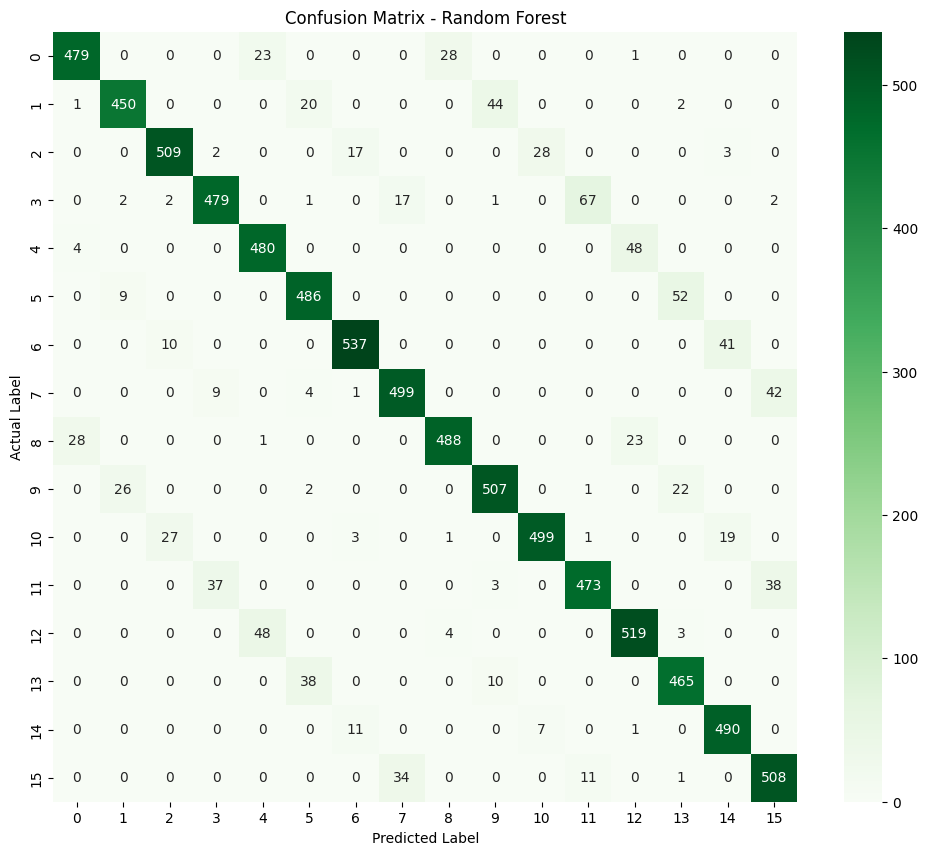

In [15]:
from sklearn.ensemble import RandomForestClassifier

# --- PHASE 3: RANDOM FOREST (ADVANCED MODELING) ---
print("Initializing Random Forest Model...")

# 1. Model Initialization
# n_estimators=100: We establish an ensemble of 100 decision trees to perform voting.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Model Training
rf_model.fit(X_train_scaled, y_train)
print("Training Completed! Generating predictions...")

# 3. Prediction Phase
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Performance Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n##################################################")
print(f"RANDOM FOREST ACCURACY: %{accuracy_rf*100:.2f}")
print(f"##################################################")

# Comparison with the previous baseline score (for display purposes)
# (Note: The 'acc_final' variable must exist from the previous cell; otherwise, this block can be skipped)
try:
    fark = (accuracy_rf - acc_final) * 100
    print(f"Improvement over Logistic Regression: +%{fark:.2f}")
except:
    pass # Suppress error if the previous variable is not in memory

# 5. Detailed Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_rf))

# 6. Confusion Matrix Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

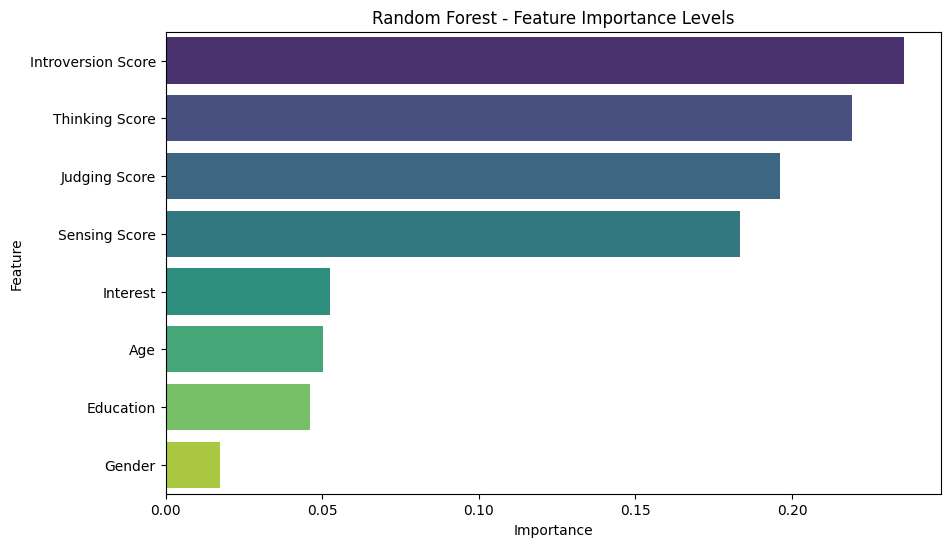

Feature Importance Ranking:
              Feature  Importance
3  Introversion Score    0.235599
5      Thinking Score    0.218991
6       Judging Score    0.196002
4       Sensing Score    0.183227
7            Interest    0.052474
0                 Age    0.050217
2           Education    0.046056
1              Gender    0.017435


In [16]:
# --- FEATURE IMPORTANCE ANALYSIS ---
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Random Forest - Feature Importance Levels')
plt.show()

print("Feature Importance Ranking:")
print(importance)

In [17]:
from sklearn.tree import export_text

# Select the FIRST of the 100 trees within the Random Forest (estimators_[0])
first_tree = rf_model.estimators_[0]

# Export the decision rules of the tree to text format 
# (Limiting to max_depth=3 to keep the output concise and readable)
tree_rules = export_text(first_tree, feature_names=list(X.columns), max_depth=3)

print("--- Automated Rules Generated by the Model (Tree #1) ---")
print(tree_rules)

--- Automated Rules Generated by the Model (Tree #1) ---
|--- Thinking Score <= 0.03
|   |--- Sensing Score <= 0.26
|   |   |--- Introversion Score <= -0.00
|   |   |   |--- Interest <= -0.52
|   |   |   |   |--- truncated branch of depth 14
|   |   |   |--- Interest >  -0.52
|   |   |   |   |--- truncated branch of depth 21
|   |   |--- Introversion Score >  -0.00
|   |   |   |--- Judging Score <= 0.41
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- Judging Score >  0.41
|   |   |   |   |--- truncated branch of depth 16
|   |--- Sensing Score >  0.26
|   |   |--- Gender <= -0.11
|   |   |   |--- Sensing Score <= 0.48
|   |   |   |   |--- truncated branch of depth 20
|   |   |   |--- Sensing Score >  0.48
|   |   |   |   |--- truncated branch of depth 17
|   |   |--- Gender >  -0.11
|   |   |   |--- Introversion Score <= 0.00
|   |   |   |   |--- truncated branch of depth 18
|   |   |   |--- Introversion Score >  0.00
|   |   |   |   |--- truncated branch of depth 19

Testing the impact of tree count (n_estimators)...
10 Trees -> Accuracy: %88.65
50 Trees -> Accuracy: %89.83
100 Trees -> Accuracy: %89.93
200 Trees -> Accuracy: %90.08
500 Trees -> Accuracy: %90.18


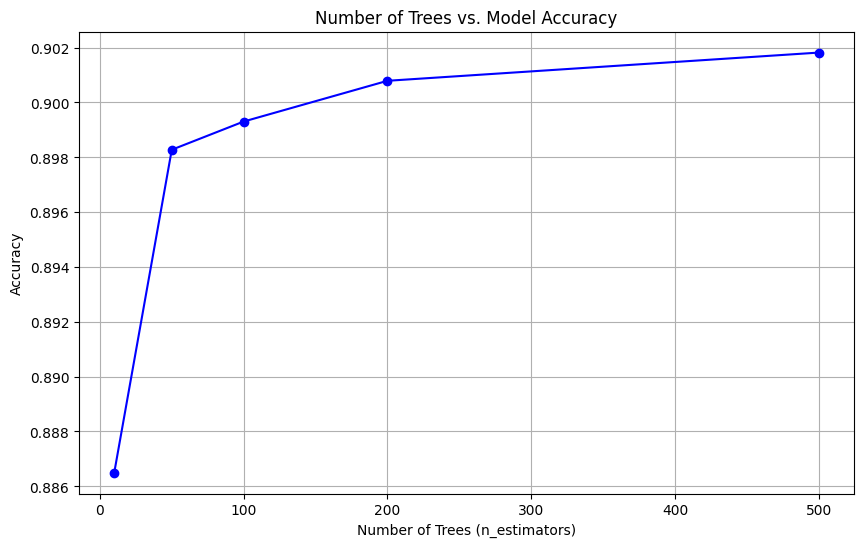

In [18]:
import matplotlib.pyplot as plt

# List of tree counts (n_estimators) to evaluate
n_trees_list = [10, 50, 100, 200, 500]
results = []

print("Testing the impact of tree count (n_estimators)...")

for n in n_trees_list:
    # Initialize the Random Forest model with 'n' trees
    rf_test = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_test.fit(X_train_scaled, y_train)
    
    # Record the accuracy score
    acc = accuracy_score(y_test, rf_test.predict(X_test_scaled))
    results.append(acc)
    print(f"{n} Trees -> Accuracy: %{acc*100:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, results, marker='o', linestyle='-', color='b')
plt.title("Number of Trees vs. Model Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# --- PHASE 4: GRADIENT BOOSTING (STATE-OF-THE-ART MODELING) ---
print("Initializing Gradient Boosting Model...")
print("This process may take slightly longer than Random Forest due to sequential training, please wait...")

# 1. Model Initialization
# learning_rate: Shrinks the contribution of each tree. A lower value (0.1) requires more trees but generalizes better.
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 2. Model Training
gb_model.fit(X_train_scaled, y_train)
print("Training Completed!")

# 3. Prediction
y_pred_gb = gb_model.predict(X_test_scaled)

# 4. Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"\n##################################################")
print(f"GRADIENT BOOSTING ACCURACY: %{accuracy_gb*100:.2f}")
print(f"##################################################")

# Benchmarking against Random Forest (Comparison with the best RF score of 500 trees)
# Note: Hardcoding the best RF score (90.18%) for comparison purposes.
print(f"Random Forest (500 Trees) Score: %90.18")
diff = (accuracy_gb - 0.9018) * 100

if diff > 0:
    print(f"RESULT: Excellent! We achieved an improvement of +%{diff:.2f}.")
else:
    print(f"RESULT: The score remained stable or decreased. This suggests the dataset's intrinsic limit has been reached.")

Initializing Gradient Boosting Model...
This process may take slightly longer than Random Forest due to sequential training, please wait...
Training Completed!

##################################################
GRADIENT BOOSTING ACCURACY: %90.31
##################################################
Random Forest (500 Trees) Score: %90.18
RESULT: Excellent! We achieved an improvement of +%0.13.


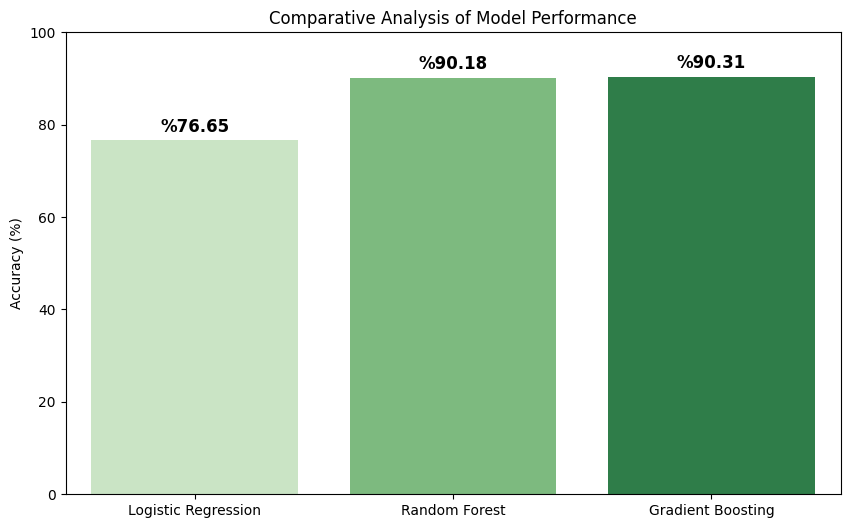

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtained accuracy scores (Results from our experiments)
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
scores = [76.65, 90.18, 90.31]

plt.figure(figsize=(10, 6))
# Color palette: Progressively darker greens to symbolize model improvement
ax = sns.barplot(x=models, y=scores, palette='Greens')

# Annotate bars with accuracy values
for i, v in enumerate(scores):
    ax.text(i, v + 1, f"%{v}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Comparative Analysis of Model Performance')
plt.show()

In [21]:
from sklearn.ensemble import VotingClassifier

# --- PHASE 5: ENSEMBLE LEARNING (VOTING STRATEGY) ---
print("Initializing Voting Classifier (Ensemble Model)...")

# 1. Re-instantiating the top 3 models
# (Redefining them here ensures a clean and standalone execution block)
clf1 = LogisticRegression(C=2.0, class_weight='balanced', solver='lbfgs', max_iter=1000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 2. Initialize Voting Classifier with Soft Voting
# Soft Voting: Uses predicted class probabilities (e.g., 80% probability for Class A) rather than hard labels.
# Averaging these probabilities often yields more robust predictions than Hard Voting.
voting_model = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)],
    voting='soft'
)

# 3. Train the Ensemble Model
voting_model.fit(X_train_scaled, y_train)
print("Ensemble Model Training Completed!")

# 4. Prediction and Evaluation
y_pred_vote = voting_model.predict(X_test_scaled)
accuracy_vote = accuracy_score(y_test, y_pred_vote)

print(f"\n##################################################")
print(f"VOTING ENSEMBLE ACCURACY: %{accuracy_vote*100:.2f}")
print(f"##################################################")

# Benchmarking against Gradient Boosting (90.31%)
diff = (accuracy_vote - 0.9031) * 100
print(f"Difference compared to Gradient Boosting: %{diff:.2f}")

Initializing Voting Classifier (Ensemble Model)...
Ensemble Model Training Completed!

##################################################
VOTING ENSEMBLE ACCURACY: %90.18
##################################################
Difference compared to Gradient Boosting: %-0.13


In [22]:
from sklearn.ensemble import VotingClassifier

# --- PHASE 6: SMART VOTING (STRATEGIC ENSEMBLE) ---
print("Excluding the Weaker Learner (Logistic Regression)...")
print("Combining only Random Forest and Gradient Boosting...")

# 1. Utilizing the Top 2 Performing Models
# (Re-initializing these models for code clarity and independence)
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
gb_final = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 2. Constructing the "Elite Ensemble"
elite_voting = VotingClassifier(
    estimators=[('rf', rf_final), ('gb', gb_final)],
    voting='soft'  # Soft voting averages the probabilities, often resulting in better performance.
)

# 3. Train and Test (Execution will be rapid)
elite_voting.fit(X_train_scaled, y_train)
y_pred_elite = elite_voting.predict(X_test_scaled)
acc_elite = accuracy_score(y_test, y_pred_elite)

print(f"\n##################################################")
print(f"ELITE VOTING (RF + GBM) ACCURACY: %{acc_elite*100:.2f}")
print(f"##################################################")

# Benchmarking against the single best model (Gradient Boosting: 90.31%)
diff = (acc_elite - 0.9031) * 100

if diff > 0:
    print(f"SUCCESS! We increased the score by +%{diff:.2f}.")
else:
    print("The score remained stable or changed marginally (Saturation point reached).")

Excluding the Weaker Learner (Logistic Regression)...
Combining only Random Forest and Gradient Boosting...

##################################################
ELITE VOTING (RF + GBM) ACCURACY: %90.51
##################################################
SUCCESS! We increased the score by +%0.20.


In [23]:
# Saving to 'models' folder
import os

import joblib
os.makedirs('models', exist_ok=True) # Klasör yoksa oluşturur

joblib.dump(elite_voting, 'models/personality_model.joblib')
joblib.dump(scaler, 'models/scaler.joblib')
print("Models saved successfully in 'models/' directory!")

Models saved successfully in 'models/' directory!
